In [27]:
from IPython.display import Image 
import numpy as np
import time
import random
opciones_numeros = ["1","2","3"]
opciones_posiciones = ["A1", "A2", "A3", "B1","B2", "B3", "C1", "C2", "C3"]


def Bienvenida():
    print("¡Hola,bienvenido a Mini-Sudoku!\n")
    nombre_usuario = input("¿Cual es tu nombre?\n\n")
    return nombre_usuario

def Instrucciones(nombre):
    print("""\nMini-Sudoku es muy fácil de jugar, sigue las siguientes instrucciones para completar la cuadrícula de juego:\nMini-Sudoku se juega en una cuadrícula de 3 x 3 espacios. La cuadrícula debe completarse con los \nnúmeros del 1 al 3, sin repetir ningún número dentro de ninguna fila o columna.\nCuando el programa lo indique, escriba el número que desea colocar(solo números del 1 al 3).\nDespués escriba el cuadro donde desea colocar el número de acuerdo a la siguiente cuadrícula:
            """)
    imagen = Image(r"cuadricula.jpg")
    display(imagen)
    print("""\n¡Cuando toda la cuadrícula esté llena y no haya numeros repetidos en las filas o columnas habrás ganado el juego!
            """)
    input("Presiona Enter para continuar...")
    print("\n")
    

def RevisaRepetidos(cuadricula):
    for j in range(3):
        i = 0
        while i < 3:
            a = cuadricula[i, j]
            for s in range(i+1, 3):
                if cuadricula[s, j] == a and a != 0:
                    return False
                else:
                    pass
            i += 1
       
    columnas = np.count_nonzero(cuadricula, axis=0)   
    for i in range(cuadricula.shape[1]):
        if (np.unique(cuadricula[:, i]).size < cuadricula.shape[0]) and columnas[i]>1:
            return False 
        else:
            pass
        
    return True
    
def CuadroInicial():
    
    comprobacion = False
    while comprobacion == False:
        cuadricula = np.zeros([3,3], dtype=np.int32)
        cuadricula[0][random.randint(0,2)] = random.randint(1,3)
        cuadricula[2][random.randint(0,2)] = random.randint(1,3)
        comprobacion = RevisaRepetidos(cuadricula)
    print("Esta es la cuadrícula inicial de juego:\n\n",cuadricula)
    return cuadricula  
        


def RondaDeJuego(cuadricula):
    numero = input("\nEscribe un número del 1 al 3 para colocar en la cuadrícula: \n").strip()
    while numero not in opciones_numeros:
        print("Esa no es una opición válida.\n")
        numero = input("\nEscribe un número del 1 al 3 para colocar en la cuadrícula: \n").strip()
        
    posicion = input("\nEscribe la posición en donde quieres colocar el número: \n").strip().upper()
    while posicion not in opciones_posiciones:
        print("Esa no es una opición válida.\n")
        posicion = input("\nEscribe la posición en donde quieres colocar el número: \n").strip().upper()
    
    posicion_columna = posicion[1]
    posicion_fila = posicion[0]
    
    
    if posicion_fila == "A":
        posicion_fila = 0
    elif posicion_fila == "B":
        posicion_fila = 1
    if posicion_fila == "C":
        posicion_fila = 2
        
    
    cuadricula[posicion_fila][int(posicion_columna)-1] = numero
    return cuadricula

def RevisaSolucion(cuadricula):
    
    soluciones_filas = cuadricula.sum(axis=1, dtype=np.int32)
    soluciones_columnas = cuadricula.sum(axis=0, dtype=np.int32)
                                                                                                                  
    for i in soluciones_filas:
        if i == 6:
            pass
        else:
            return False
    for i in soluciones_columnas:
        if i == 6:
            pass
        else:
            return False
    
    comprobacion = RevisaRepetidos(cuadricula)
    return comprobacion                                                                                                         
    
def main():    
    nombre = Bienvenida()
    Instrucciones(nombre)
    repeticion = True
    tiempo_incicio = time.time()
    while repeticion == True:
        cuadricula = CuadroInicial()
        cuadricula = RondaDeJuego(cuadricula)
        solucion = RevisaSolucion(cuadricula)
        print("\n", cuadricula)
        while solucion == False:
            cuadricula = RondaDeJuego(cuadricula)
            solucion = RevisaSolucion(cuadricula)
            print(cuadricula,"\n")

        tiempo_total=round((time.time() - tiempo_incicio), 2)
        print("¡Felicidades " + nombre + "!"+ "¡Has ganado!\n")
        print("Tu tiempo para resolver el Sudoku fue de: ",tiempo_total," segundos.")
        if input("\n¿Deseas jugar otra vez? (Y/N)").strip().upper() == "Y":
            repeticion = True
        else:
            repeticion = False


In [24]:
cuadricula = np.zeros([3,3], dtype=np.int32)
cuadricula[0][random.randint(0,2)] = random.randint(1,3)
cuadricula[2][random.randint(0,2)] = random.randint(1,3)
cuadricula_set = set(cuadricula[:][1])
print(cuadricula_set)

{0}


¡Hola,bienvenido a Mini-Sudoku!

¿Cual es tu nombre?

y

Mini-Sudoku es muy fácil de jugar, sigue las siguientes instrucciones para completar la cuadrícula de juego:
Mini-Sudoku se juega en una cuadrícula de 3 x 3 espacios. La cuadrícula debe completarse con los 
números del 1 al 3, sin repetir ningún número dentro de ninguna fila o columna.
Cuando el programa lo indique, escriba el número que desea colocar(solo números del 1 al 3).
Después escriba el cuadro donde desea colocar el número de acuerdo a la siguiente cuadrícula:
            


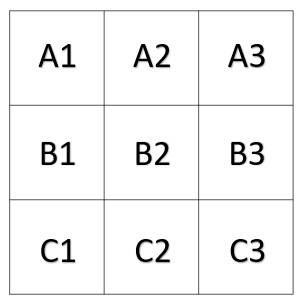


¡Cuando toda la cuadrícula esté llena y no haya numeros repetidos en las filas o columnas habrás ganado el juego!
            
Presiona Enter para continuar...


Esta es la cuadrícula inicial de juego:

 [[0 1 0]
 [0 0 0]
 [0 2 0]]

Escribe un número del 1 al 3 para colocar en la cuadrícula: 
2

Escribe la posición en donde quieres colocar el número: 
a1

 [[2 1 0]
 [0 0 0]
 [0 2 0]]

Escribe un número del 1 al 3 para colocar en la cuadrícula: 
3

Escribe la posición en donde quieres colocar el número: 
a3
[[2 1 3]
 [0 0 0]
 [0 2 0]] 


Escribe un número del 1 al 3 para colocar en la cuadrícula: 
3

Escribe la posición en donde quieres colocar el número: 
b1
[[2 1 3]
 [3 0 0]
 [0 2 0]] 


Escribe un número del 1 al 3 para colocar en la cuadrícula: 
3

Escribe la posición en donde quieres colocar el número: 
b2
[[2 1 3]
 [3 3 0]
 [0 2 0]] 


Escribe un número del 1 al 3 para colocar en la cuadrícula: 
2

Escribe la posición en donde quieres colocar el número: 
a1
[[2 1 3]
 [3 3 0]
 [0 

In [34]:
if __name__ == '__main__':
    main()